# Descriptores de forma para nubes de puntos 3D

## Base de datos

Adquisición de nube de puntos a partir de video

<img src="images/data_adq.png" style="width: 700px;">

## 3D Point Cloud

In [1]:
from pyntcloud import PyntCloud
import numpy as np

cloud = PyntCloud.from_file("data/050.ply")
cloud.points.describe()

,x,y,z,nx,ny,nz,red,green,blue,alpha
count,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.0
mean,-2.078718,1.095724,0.228201,0.037529,-0.019235,-0.132769,144.441810,129.367544,117.276539,255.0
std,0.299813,1.638542,0.703248,0.690215,0.427445,0.567032,30.459892,34.182228,36.577246,0.0
min,-2.803260,-1.636970,-2.958720,-0.999971,-0.999520,-0.999900,24.000000,24.000000,23.000000,255.0
25%,-2.324630,-0.243042,-0.191804,-0.671336,-0.313780,-0.636432,130.000000,107.000000,93.000000,255.0
50%,-2.090480,0.791329,0.196433,0.179696,-0.029879,-0.195724,147.000000,126.000000,113.000000,255.0
75%,-1.829800,2.169530,0.683252,0.687106,0.278665,0.317076,163.000000,152.000000,139.000000,255.0
max,-1.207110,5.187420,3.716330,0.999955,0.941484,0.999918,230.000000,241.000000,246.000000,255.0


In [2]:
cloud.plot(backend="threejs")

### Inclination (Degrees)

Inclinación vertical respecto al eje Z en grados.


$\huge I_d = \arccos (N_z) \times \frac{180}\pi{}$

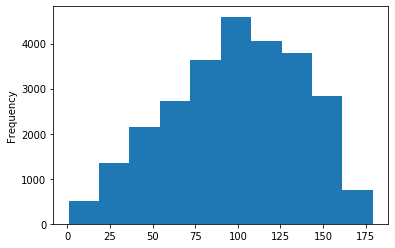

In [3]:
inclination_degrees = cloud.add_scalar_field("inclination_degrees")
cloud.points[inclination_degrees].plot(kind="hist")

In [4]:
cloud.plot(use_as_color=inclination_degrees, cmap="jet", backend="threejs")

### Orientation (Degrees)

Orientación horizontal con respecto al plano XY en grados.

$\huge O_d = \arctan (N_x, N_y) \times \frac{180}\pi{}$

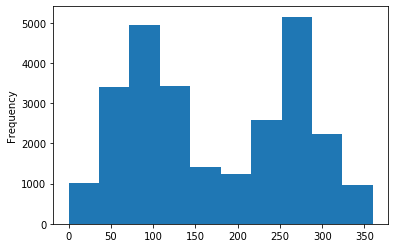

In [5]:
orientation_degrees = cloud.add_scalar_field("orientation_degrees")
cloud.points[orientation_degrees].plot(kind="hist")

In [6]:
cloud.plot(use_as_color=orientation_degrees, cmap="jet", backend="threejs")

### k neighbors

Nearest Neighbor: Encontrando vecinos más cercanos de cada punto.
Los vecinos más cercanos a cada punto de consulta se calculan utilizando el algoritmo de búsqueda basado en Kd-tree.

Un árbol k-d, o árbol tridimensional, es una estructura de datos utilizada para organizar cierto número de puntos en un espacio con k dimensiones. Para nuestros propósitos, por lo general solo trataremos con nubes de puntos en tres dimensiones, por lo que todos nuestros árboles k-d serán tridimensionales. Cada nivel de un árbol k-d divide todos los elementos secundarios a lo largo de una dimensión específica, utilizando un hiperplano que es perpendicular al eje correspondiente.

In [7]:
k_neighbors = cloud.get_neighbors(k=25) #k=8,25,50,100
print(k_neighbors)
print(k_neighbors.shape)

[[    0    37    35 ... 16470 12338 21281]
 [    0    37    35 ... 16470 12338 21281]
 [    2  7918  3162 ...  1677 14299  5932]
 ...
 [22476 26176 26197 ... 22440 23042 20983]
 [26206 24675 25374 ... 17131 25779   183]
 [26316 26397 26317 ... 22449 26204 20708]]
(26405, 25)


# Eigenvalues

### eigenvalues

Los valores propios y los vectores propios ocupan un lugar destacado en el análisis de las transformaciones lineales. El prefijo eigen- se adopta de la palabra alemana eigen para **"característico"**. Originalmente utilizado para estudiar los ejes principales del movimiento de rotación de cuerpos rígidos.

En esencia, un vector propio v de una transformación lineal T es un vector distinto de cero que, cuando se le aplica T , **no cambia de dirección**. La aplicación de T al vector propio solo escala el vector propio mediante el valor escalar λ , denominado valor propio. Esta condición se puede escribir como la ecuación.

T(v) = λv

referido como la ecuación del valor propio o eigenequation . En general, λ puede ser cualquier escalar . Por ejemplo, λ puede ser negativo, en cuyo caso el vector propio invierte la dirección como parte de la escala, o puede ser cero o complejo.

In [8]:
eigenvalues = cloud.add_scalar_field("eigen_values", k_neighbors=k_neighbors)
print(eigenvalues)

['e1(26)', 'e2(26)', 'e3(26)']


In [9]:
cloud.points.describe()

,x,y,z,nx,ny,nz,red,green,blue,alpha,inclination_deg,orientation_deg,e1(26),e2(26),e3(26)
count,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.0,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000
mean,-2.078718,1.095724,0.228201,0.037529,-0.019235,-0.132769,144.441810,129.367544,117.276539,255.0,98.787552,172.925842,0.002063,0.001055,0.000266
std,0.299813,1.638542,0.703248,0.690215,0.427445,0.567032,30.459892,34.182228,36.577246,0.0,38.524532,95.117058,0.002405,0.000942,0.000442
min,-2.803260,-1.636970,-2.958720,-0.999971,-0.999520,-0.999900,24.000000,24.000000,23.000000,255.0,0.733820,0.040223,0.000261,0.000170,0.000007
25%,-2.324630,-0.243042,-0.191804,-0.671336,-0.313780,-0.636432,130.000000,107.000000,93.000000,255.0,71.513809,88.060890,0.001025,0.000621,0.000103
50%,-2.090480,0.791329,0.196433,0.179696,-0.029879,-0.195724,147.000000,126.000000,113.000000,255.0,101.287018,149.859848,0.001436,0.000847,0.000161
75%,-1.829800,2.169530,0.683252,0.687106,0.278665,0.317076,163.000000,152.000000,139.000000,255.0,129.526260,264.014923,0.002235,0.001160,0.000280
max,-1.207110,5.187420,3.716330,0.999955,0.941484,0.999918,230.000000,241.000000,246.000000,255.0,179.189636,359.944000,0.043087,0.018966,0.011380


### Eigen Entropy

Coloquialmente, suele considerarse que la entropía es el desorden de un sistema, es decir, su grado de **homogeneidad**. 

(Xu Zhan, Yong Cai and Ping He Oct/18) La definición de entropía de la información es propuesta por Shannon. Se aplica en el cálculo del importe medio de la información. La información asociada a la probabilidad de datos. Cuanto más baja es la probabilidad, más información tiene el evento.
La cantidad de información transmitida por cada evento depende del valor de la variable aleatoria. El valor es la entropía de la información.
En este artículo, la entropía de información se desarrolla para calcular la entropía de la nube de puntos. Primero, necesitamos proyectar la nube de puntos en los ejes X, Y, Z, respectivamente. La entropía de información de X, Y, Z es la cantidad promedio de información. La fórmula se define a continuación, donde p x es la probabilidad de las nubes de puntos 3D se proyectan al eje X, y está relacionado con la frecuencia.

H(x) = - sum px X log(px)

H(y) = - sum py X log(py)

H(z) = - sum pz x log(pz)


$\huge E_\lambda = - \sum_{j=1}^{3} \lambda_j \ln(\lambda_j)$

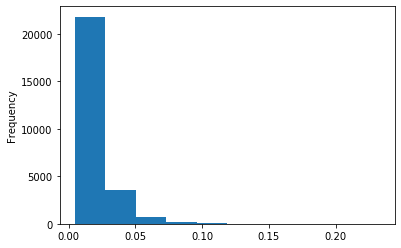

In [10]:
eigenentropy = cloud.add_scalar_field("eigenentropy", ev=eigenvalues)
cloud.points[eigenentropy].plot(kind="hist")

In [11]:
cloud.plot(use_as_color=eigenentropy, cmap="jet", backend="threejs")

### sum of eigen values

Se define como la suma de la entropía de la información cuando las nubes de puntos 3D se proyectan en los ejes X, Y, Z

$\huge \sum_\lambda = \sum_{j=1}^{3} \lambda_j$

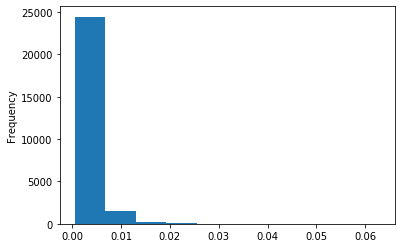

In [12]:
eigensum = cloud.add_scalar_field("eigen_sum", ev=eigenvalues)
cloud.points[eigensum].plot(kind="hist")

In [13]:
cloud.plot(use_as_color=eigensum, cmap="jet", backend="threejs")

### Anisotropy

Es la propiedad de ser **direccionalmente dependiente**, lo que implica diferentes propiedades en diferentes direcciones, en oposición a la isotropía . Puede definirse como una diferencia, cuando se mide a lo largo de diferentes ejes

$\huge A_\lambda = \frac{\lambda_1 - \lambda_2}{\lambda_3}$

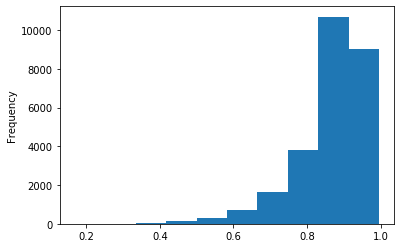

In [14]:
anisotropy = cloud.add_scalar_field("anisotropy", ev=eigenvalues)
cloud.points[anisotropy].plot(kind="hist")

In [15]:
cloud.plot(use_as_color=anisotropy, cmap="jet", backend="threejs")

### Curvature

La curvatura es la cantidad por la cual un objeto geométrico dentro de un espacio euclídeo se desvía de ser plano, o lineal, pero esto se define de diferentes maneras dependiendo del contexto.En un plano, esta es una magnitud escalar, pero en tres o más dimensiones se puede definir un vector de curvatura que **tiene en cuenta la dirección de la curva además de qué tan pronunciada es**. 

Un ejemplo de dos de las características de puntos geométricos más utilizadas es la curvatura estimada de la superficie subyacente y la normal en un punto de consulta p. Ambos se consideran características locales, ya que caracterizan un punto utilizando la información proporcionada por sus k vecinos de punto más cercanos. Para determinar estos vecinos de manera eficiente, el conjunto de datos de entrada generalmente se divide en trozos más pequeños utilizando técnicas de descomposición espacial tales como octree o kD-trees (vea la figura a continuación: izquierda: kD-tree, derecha: octree), y luego se realizan las búsquedas de puntos más cercanos en ese espacio Dependiendo de la aplicación, se puede optar por determinar un número fijo de k puntos cerca de p, o todos los puntos que se encuentran dentro de una esfera de radio r centrada en p. Indiscutiblemente, uno de los métodos más fáciles para estimar las normales de la superficie y los cambios de curvatura en un punto p es realizar una composición electrónica (es decir, calcular los vectores propios y los valores propios) del parche de superficie del punto de vecindad k. Por lo tanto, el vector propio correspondiente al valor propio más pequeño se aproximará a la normal de la superficie n en el punto p, mientras que el cambio de curvatura de la superficie se estimará a partir de los valores propios como:

$\frac{\lambda_0}{\lambda_0 + \lambda_1 + \lambda_2}$, where $\lambda_0 < \lambda_1 < \lambda_2$


$\huge C_\lambda = \frac{\lambda_3}{\sum_\lambda}$

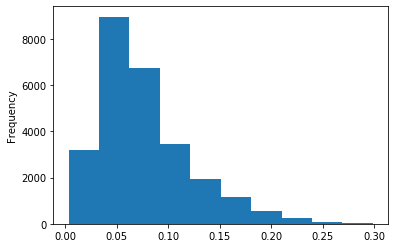

In [16]:
curvature = cloud.add_scalar_field("curvature", ev=eigenvalues)
cloud.points[curvature].plot(kind="hist")

In [17]:
cloud.plot(use_as_color=curvature, cmap="jet", backend="threejs")

### Linearity

La propiedad de linealidad está asociada al concepto de espacio vectorial, conjuntos en los que se definen dos operaciones, una interna (suma de vectores {\displaystyle x+y\;} {\displaystyle x+y\;}) y otra externa (multiplicación por un escalar λx, en la que λ pertenece a un conjunto externo), de ahí que la propiedad de linealidad se exprese referida a estas dos operaciones.

$\huge L_\lambda = \frac{\lambda_1 - \lambda_2}{\lambda_1}$

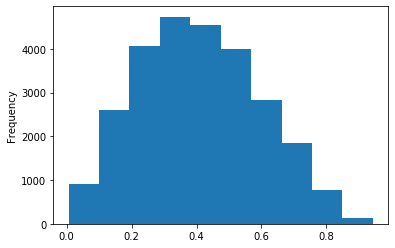

In [18]:
linearity = cloud.add_scalar_field("linearity", ev=eigenvalues)
cloud.points[linearity].plot(kind="hist")

In [19]:
cloud.plot(use_as_color=linearity, cmap="jet", backend="threejs")

### Omnivariance 

Es un descriptor para la distribución 3D de puntos en el vecindario. Característica basada en los valores propios de la matriz de **covarianza de un vecindario** local.
Se define omnivarianza, para los 3 valores propios λ1≥λ2≥λ3≥0, como: (λ1 × λ2 × λ3)^(1/3)

$\large O_\lambda = \sqrt[3]{\prod_{j=1}^{3}\lambda_j}$

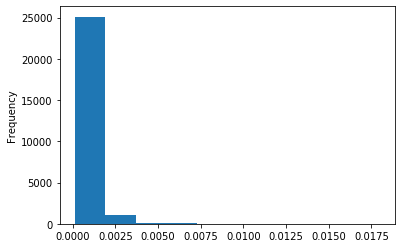

In [20]:
omnivariance = cloud.add_scalar_field("omnivariance", ev=eigenvalues)
cloud.points[omnivariance].plot(kind="hist")

In [21]:
cloud.plot(use_as_color=omnivariance, cmap="jet", backend="threejs")

### Planarity

Esta característica se puede utilizar para detectar estructuras relacionados con un plano geométrico. Plano o llano.

$\huge P_\lambda = \frac{\lambda_2 - \lambda_3}{\lambda_1}$

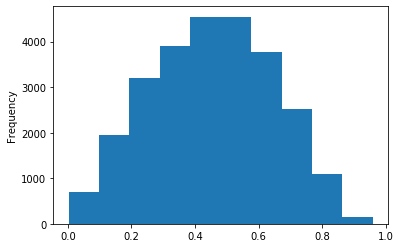

In [22]:
planarity = cloud.add_scalar_field("planarity", ev=eigenvalues)
cloud.points[planarity].plot(kind="hist")

In [23]:
cloud.plot(use_as_color=planarity, cmap="jet", backend="threejs")

### Sphericity

La característica de **esfericidad** permite la exposición de puntos de **alta curvatura**. Estas dos características (lienalidad y esfericidad) son descriptores geométricos útiles para la clasificación de la nube de puntos, la partición y la extracción de características. 

$\huge S_\lambda = \frac{\lambda_3}{\lambda_1}$

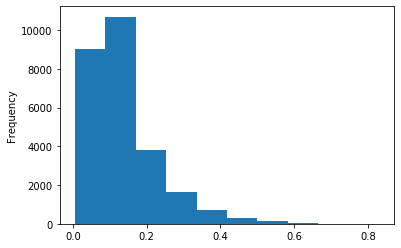

In [24]:
sphericity = cloud.add_scalar_field("sphericity", ev=eigenvalues)
cloud.points[sphericity].plot(kind="hist")

In [25]:
cloud.plot(use_as_color=sphericity, cmap="jet", backend="threejs")

### save (describe) file in csv

In [26]:
describe = cloud.points.describe()
describe.to_csv('CloudNormals_Describe.csv', index=True)
describe

,x,y,z,nx,ny,nz,red,green,blue,alpha,...,e2(26),e3(26),eigenentropy(26),eigen_sum(26),anisotropy(26),curvature(26),linearity(26),omnivariance(26),planarity(26),sphericity(26)
count,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.0,...,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000,26405.000000
mean,-2.078718,1.095724,0.228201,0.037529,-0.019235,-0.132769,144.441810,129.367544,117.276539,255.0,...,0.001055,0.000266,0.021105,0.003384,0.863049,0.076741,0.408456,0.000784,0.454593,0.136951
std,0.299813,1.638542,0.703248,0.690215,0.427445,0.567032,30.459892,34.182228,36.577246,0.0,...,0.000942,0.000442,0.015617,0.003586,0.093454,0.044905,0.185453,0.000882,0.191598,0.093454
min,-2.803260,-1.636970,-2.958720,-0.999971,-0.999520,-0.999900,24.000000,24.000000,23.000000,255.0,...,0.000170,0.000007,0.004593,0.000545,0.169354,0.003270,0.005775,0.000139,0.002308,0.004712
25%,-2.324630,-0.243042,-0.191804,-0.671336,-0.313780,-0.636432,130.000000,107.000000,93.000000,255.0,...,0.000621,0.000103,0.013137,0.001836,0.828865,0.044871,0.267473,0.000419,0.309620,0.073515
50%,-2.090480,0.791329,0.196433,0.179696,-0.029879,-0.195724,147.000000,126.000000,113.000000,255.0,...,0.000847,0.000161,0.017076,0.002496,0.887662,0.066020,0.397821,0.000578,0.458174,0.112338
75%,-1.829800,2.169530,0.683252,0.687106,0.278665,0.317076,163.000000,152.000000,139.000000,255.0,...,0.001160,0.000280,0.023485,0.003642,0.926485,0.097791,0.540751,0.000834,0.600326,0.171135
max,-1.207110,5.187420,3.716330,0.999955,0.941484,0.999918,230.000000,241.000000,246.000000,255.0,...,0.018966,0.011380,0.232795,0.062887,0.995288,0.298457,0.943384,0.017956,0.959639,0.830646


# Filters

### Radius Outlier Removal Filter

Eliminar todos los índices en su nube de entrada que no tienen al menos cierto número de **vecinos dentro de un rango**.

Parametros: 

k- Num de vecinos

r- El radio de la esfera con centro en cada punto.

El filtro buscará el número requerido de vecinos dentro de esa esfera.
Un valor 'r' INFERIOR dará como resultado un mayor número de puntos recortados.

Los puntos que tengan cualquier distancia marcada como False se recortarán.
Las distancias entre cada punto y sus 'k' vecinos más cercanos que exceder la 'r' dada se marcan como Falso.

In [27]:
kdtree_id = cloud.add_structure("kdtree")
kdtree_id

'K(16,False,False)'

In [28]:
points = cloud.xyz
kdtree = cloud.structures[kdtree_id]

In [29]:
k = 10
r = 0.05

In [30]:
distances = kdtree.query(points, k=k, n_jobs=-1)[0]
print(distances)

[[0.00000000e+00 0.00000000e+00 3.10969602e-02 ... 5.66168645e-02
  5.66761311e-02 5.93296313e-02]
 [0.00000000e+00 0.00000000e+00 3.10969602e-02 ... 5.66168645e-02
  5.66761311e-02 5.93296313e-02]
 [0.00000000e+00 0.00000000e+00 7.24310054e-05 ... 2.39831824e-02
  2.72763056e-02 2.79675196e-02]
 ...
 [0.00000000e+00 7.18051917e-03 1.20787918e-02 ... 2.14880031e-02
  2.26393415e-02 2.51478879e-02]
 [0.00000000e+00 7.03674185e-02 7.14982522e-02 ... 8.36954312e-02
  8.46234283e-02 8.64081228e-02]
 [0.00000000e+00 4.28771272e-02 4.54419400e-02 ... 7.76665039e-02
  7.84395181e-02 8.75366625e-02]]


In [31]:
ror_filter = np.all(distances < r, axis=1)
ror_filter

array([False, False,  True, ...,  True, False, False])

In [32]:
np.sum(ror_filter)

15983

### Statistical Outlier Removal Filter

Filtro de eliminación de valores atípicos estadísticos utilizando el KDTree dado.
     
Parámetros

k: Núm de vecinos que se usarán para calcular el filtro.

z_max: La puntuación máxima de Z que determina si el punto es un valor atípico.


Para cada punto, **calcula la media de las distancias entre él y su 'k' vecinos más cercanos**.
Se calcula la puntuación Z de esas medias.
Los puntos con una puntuación Z fuera del rango [-z_max, z_max] están marcados como falso, para ser recortado.
     
El parámetro opcional z_max debe usarse para ajustar el filtro al resultado deseado.
Un valor 'Z_max' INFERIOR dará como resultado un mayor número de puntos recortados.

In [33]:
z_max = 0.05

In [34]:
distances_sta = kdtree.query(points, k=k, n_jobs=-1)[0]

from scipy.stats import zscore
z_distances = zscore(np.mean(distances_sta, axis=1), ddof=1)
print(z_distances)

[ 0.15253245  0.15253245 -1.13569362 ... -1.18394399  2.22426204
  1.46683991]


In [35]:
sor_filter = abs(z_distances) < z_max
sor_filter

array([False, False, False, ..., False, False, False])

In [36]:
np.sum(sor_filter)

1436

In [37]:
cloud.points['ror_filter'] = ror_filter

In [38]:
cloud.points['sor_filter'] = sor_filter

In [39]:
cloud.points.to_csv('CloudFilters.csv', index=True)

### Point Cloud filtered

In [40]:
cloud_ror = cloud.points
cloud_ror.head()

,x,y,z,nx,ny,nz,red,green,blue,alpha,...,eigenentropy(26),eigen_sum(26),anisotropy(26),curvature(26),linearity(26),omnivariance(26),planarity(26),sphericity(26),ror_filter,sor_filter
0,-1.88340,2.48449,0.036586,0.512668,0.270425,0.814888,107,76,66,255,...,0.028406,0.004651,0.933445,0.046874,0.646692,0.000939,0.286753,0.066555,False,False
1,-1.88340,2.48449,0.036586,0.512668,0.270425,0.814888,107,76,66,255,...,0.028406,0.004651,0.933445,0.046874,0.646692,0.000939,0.286753,0.066555,False,False
2,-1.84814,1.89112,-0.309660,0.873496,0.110892,-0.474033,155,131,119,255,...,0.009795,0.001316,0.876565,0.084089,0.655525,0.000313,0.221040,0.123436,True,False
3,-2.48653,4.31196,1.155000,-0.410948,0.492932,0.766903,131,134,95,255,...,0.045955,0.008246,0.890955,0.076939,0.691764,0.001878,0.199191,0.109045,False,False
4,-1.91627,1.93051,0.138019,0.682870,0.618378,0.388970,94,70,61,255,...,0.020515,0.003091,0.899168,0.052893,0.194474,0.000702,0.704694,0.100832,False,False


In [41]:
from IPython.display import Video

Video("images/pointcloud_pixelado", width=400, height=300)